### Udacity 
#### Data Analyst Nanodegree

# project 2: Investigate a Dataset
# Data Set: No-show appointments
#### 20 May 2020
###### by : Ghadah Barahim

## Data Set Overview :
This dataset is from Kaggle (https://www.kaggle.com/joniarroba/noshowappointments). 
It contains more than 100K medical appointments information from Brazil in 2016.
The main concern of this dataset is whether the patients show up on their scheduled appointment or no.
Different characteristics of each patient and appointment are included in the dataset.


data = {'First Column Name':  ['First value', 'Second value',...],
        'Second Column Name': ['First value', 'Second value',...],
         ....
        }

df = pd.DataFrame (data, columns = ['First Column Name','Second Column Name',...])

In [1]:
### The columns in the Data Set :

import pandas as pd
x={'Characteristics':['PatientID' , 'AppointmentID' , 'Gender' , 'ScheduledDay' , 'AppointmentDay' , 'Age' , 'Neighborhood' , 'Scholarship' , 'Hypertension' , 'Diabetes' , 'Alcoholism' , 'Handicap' , 'SMS _received' , 'No-show'],
   'Description' : ['Identifier and a unique number for each patient.' , 'Identifier and a unique number for each appointment.' ,  'Female, Male.' , 'The day the patient set up their appointment.' , 'The day the patient is showed up.' , 'Age of the patient.' , 'The neighborhood the patient lives in.' , 'indicates whether or not the patient is enrolled in the Brasilian welfare program.' , 'If the patient has hypertension or not.' , 'If the patient has diabetes or not.' , 'If the patient has alcoholism or not.' , 'If the patient is handicap or not.' , 'Does the patient receive an SMS from the hospital?' , ' says: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up']}
z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
y = pd.DataFrame(x , columns=['Characteristics' ,'Description' ] , index = z)

y

,Characteristics,Description
1,PatientID,Identifier and a unique number for each patient.
2,AppointmentID,Identifier and a unique number for each appoin...
3,Gender,"Female, Male."
4,ScheduledDay,The day the patient set up their appointment.
5,AppointmentDay,The day the patient is showed up.
6,Age,Age of the patient.
7,Neighborhood,The neighborhood the patient lives in.
8,Scholarship,indicates whether or not the patient is enroll...
9,Hypertension,If the patient has hypertension or not.
10,Diabetes,If the patient has diabetes or not.


### The Goal of This Notbook
This project notebook analysis this dataset to see what patients' characteristics who miss their scheduled appointment and whether the characteristics of the appointment like the day or month it was in factor for patients to not show on their appointment.

# Asking Qustion? 
 
Q1 - What is the percentage of patients who did not show up in their scheduled appointment to the total patients ? 

Q2 - Which of female or male is more to not showing on their schedule appointment? 

Q3 - Is the age of patients play a role in not show in the scheduled appointment? 

Q4 -  Is there a specific day or month that the patients are more not show up at it?

Q5 -  Is there a specific day that the patients who not show up on their scheduled appointment are more likely to show up?

Q6 - Does the neighborhood that patients live in have a relationship with patients not show?

Q7 - Are patients who have a scholarship are less to miss their scheduled appointment?

Q8 - Are the patients who have a chronic disease (diabetes, or hypertension) related to not show up?

Q9 - Do the patients who have alcoholism, are more missing their appointment?

Q10 - Do the patients who are handicap, are more missing their appointment?

Q11 - Do patients who receive SMS are less likely to not show up on their appointment?


# 1. Data Wrangling

## 1.1 Import Libraries and Read DataSet

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# load the data set
df = pd.read_csv('no-show-appointments-2016.csv')

In [4]:
# show the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 1.2 Assessing The Dataset

In [5]:
# show inforomation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# 2. Cleaning Column Labels and Fixing Data Types

## 2.1 Rename Column Labels

In [8]:
# from info , we can see we should change culmns labels to be lowercase and correct some spelling errors
df.columns = df.columns.str.lower()
df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


In [9]:
df.rename(columns={'no-show' : 'no_show' , 
                   'patientid' : 'patient_id' , 
                   'appointmentid' : 'appointment_id',
                   'hipertension': 'hypertension',
                   'handcap': 'handicap',
                   'neighbourhood'  :'neighborhood'} , inplace=True)

In [10]:
df.head(0)

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


## 2.2 Fixing Data Types

In [11]:
# the type of patient_id is float , it must convert it to int
df['patient_id'] = df['patient_id'].astype(int)

In [12]:
# the type of scheduled_day and  appointment_day is str
# it must convert it to datetime
df.appointmentday = df.appointmentday.apply(np.datetime64)
df.scheduledday = df.scheduledday.apply(np.datetime64)


In [13]:
# checking the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patient_id      110527 non-null  int64         
 1   appointment_id  110527 non-null  int64         
 2   gender          110527 non-null  object        
 3   scheduledday    110527 non-null  datetime64[ns]
 4   appointmentday  110527 non-null  datetime64[ns]
 5   age             110527 non-null  int64         
 6   neighborhood    110527 non-null  object        
 7   scholarship     110527 non-null  int64         
 8   hypertension    110527 non-null  int64         
 9   diabetes        110527 non-null  int64         
 10  alcoholism      110527 non-null  int64         
 11  handicap        110527 non-null  int64         
 12  sms_received    110527 non-null  int64         
 13  no_show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

## 2.3 Checking The Data and Cleaning 

In [14]:
# checking if there any missing data
df.isnull().sum()

patient_id        0
appointment_id    0
gender            0
scheduledday      0
appointmentday    0
age               0
neighborhood      0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
dtype: int64

In [15]:
#checking if there any duplicate rows
df.duplicated().sum()

0

In [16]:
# checking the unique values
uniquevalues = df.nunique()
print(uniquevalues)

patient_id         62299
appointment_id    110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighborhood          81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
dtype: int64


### 2.3.1 Check Handicap

In [17]:
# handicap culomn , it should have only 2 unique values !
# 0 = have NOT handicap , 1 = have handicap 
df['handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [18]:
# see the wrong values of handicap
handicap_query = df[df['handicap'] > 1]
handicap_query

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
946,72825819926211,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No
1665,12429193284112,5525497,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,12429193284112,5525498,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,12429193284112,5640120,M,2016-04-29 10:08:48,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,14918292313383,5638626,F,2016-04-29 08:13:59,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,238721151823643,5756931,F,2016-06-01 08:48:28,2016-06-07,44,ROMÃO,0,1,1,0,2,1,No
109484,358949459162675,5752442,M,2016-05-31 11:45:57,2016-06-02,64,DA PENHA,0,1,1,0,2,0,No
109733,566297621534644,5772744,F,2016-06-03 16:11:00,2016-06-07,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,45221851115953,5766970,M,2016-06-02 16:07:36,2016-06-06,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [19]:
# fix the values of handicap by converting wrong values to 1
# any number NOT 0, it considers having a handicap
df['handicap'].replace({2: 1 , 3:1 , 4:1} , inplace=True)


In [20]:
# checking the changes
(df['handicap'] > 1).any()

False

### 2.3.1 Check Age

In [21]:
# from unique values of age , we see 104 unique values
# show up these unique values to see if it make sense
age_unique = df['age'].unique()
age_unique.sort()
age_unique

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [22]:
# we see there  are some questionable ages (-1 )
# first: checking age = -1
age_query1 = df[df['age'] < 0]
age_query1

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [23]:
# search by patient_id to see if there any other recored for it
id_query1 = df[df['patient_id'] == 465943158731293]
id_query1


,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [24]:
# it seems there isn't recored for this patient_id , so we will drop it
df.drop(id_query1.index , axis = 0 , inplace=True)


In [25]:
# checking of the drop
(df['patient_id'] == 465943158731293).any()


False

In [26]:
# second :  age > 115
age_query2 = df[df['age'] > 100 ]
age_query2

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
58014,976294799775439,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,31963211613981,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
90372,234283596548,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,748234579244724,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [27]:
# will drop patients who are thier ages > 100
df.drop(age_query2.index , axis=0 , inplace=True)

In [28]:
# checking of the drop
(df['age'] > 100).any()


False

In [29]:
# third: checking the age = 0 , 0 means the age start with age 1 day and less than 1 year
age_query3 = df[df['age'] == 0 ]
age_query3

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,71844284745331,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395196662956,5702537,F,2016-05-16 12:30:58,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5577525313231,5777724,M,2016-06-06 14:22:34,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,614245995575,5772400,F,2016-06-03 15:18:44,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,43218463343323,5769545,F,2016-06-03 08:56:51,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No


### 2.3.3 Sechedul day and Appointment day
Add New Columns from  Sechedul day and Appointment day

In [30]:
# the period of sechedul_day
sechedul_day_period  = 'The data for sechedul day started at {} and the last date is {}'.format(df.scheduledday.min(),df.scheduledday.max())
# the period of appointment_day 
appointment_day_period  = 'The data for appointment day started at {} and the last date is {}'.format(df.appointmentday.min(),df.appointmentday.max())
sechedul_day_period , appointment_day_period

('The data for sechedul day started at 2015-11-10 07:13:56 and the last date is 2016-06-08 20:07:23',
 'The data for appointment day started at 2016-04-29 00:00:00 and the last date is 2016-06-08 00:00:00')

In [31]:
# extracting the hour/day /month/year for each sechedul_day in new columns
df.insert(4 ,'year_of_sechedul', 'year_of_sechedul')
df.insert(5 ,'month_of_sechedul', 'month_of_sechedul')
df.insert(6 ,'day_of_sechedul', 'day_of_sechedul')
df.insert(7 ,'time_of_sechedul', 'time_of_sechedul')

df['year_of_sechedul'] = df['scheduledday'].dt.year
df['month_of_sechedul'] = df['scheduledday'].dt.month_name()
df['day_of_sechedul'] = df['scheduledday'].dt.day_name()
df['time_of_sechedul'] = df['scheduledday'].dt.strftime('%H:%M')


In [32]:
# extracting the day /month/year for each appointment_day in new columns
df.insert(9 ,'year_of_appointment', 'year_of_appointment')
df.insert(10 ,'month_of_appointment', 'month_of_appointment')
df.insert(11 ,'day_of_appointment', 'day_of_appointment')

df['year_of_appointment'] = df['appointmentday'].dt.year
df['month_of_appointment'] = df['appointmentday'].dt.month_name()
df['day_of_appointment'] = df['appointmentday'].dt.day_name()

In [33]:
# drop the scheduledday and appointmentday
df.drop('scheduledday', axis = 1 , inplace=True)
df.drop('appointmentday', axis = 1 , inplace=True)


In [34]:
# checking the drop
df.head(0)

,patient_id,appointment_id,gender,year_of_sechedul,month_of_sechedul,day_of_sechedul,time_of_sechedul,year_of_appointment,month_of_appointment,day_of_appointment,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


### 2.3.4 Check No_Show

In [35]:
#No = Show up in the appointment
#Yes = did not show up in the appointment)
df['no_show'].value_counts()

No     88203
Yes    22316
Name: no_show, dtype: int64

In [36]:
# in order to be more easy to under stand ,rename the culolmn 
# then reverse the data to be : yes = show up , no = did not show up
df.rename(columns = {'no_show' : 'show_up' } , inplace=True)

In [37]:
df['show_up'].replace({'No' : 'yes' , 'Yes' : 'no'} , inplace=True)

In [38]:
#checking
df.head()

,patient_id,appointment_id,gender,year_of_sechedul,month_of_sechedul,day_of_sechedul,time_of_sechedul,year_of_appointment,month_of_appointment,day_of_appointment,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
0,29872499824296,5642903,F,2016,April,Friday,18:38,2016,April,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,yes
1,558997776694438,5642503,M,2016,April,Friday,16:08,2016,April,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,yes
2,4262962299951,5642549,F,2016,April,Friday,16:19,2016,April,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,yes
3,867951213174,5642828,F,2016,April,Friday,17:29,2016,April,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes
4,8841186448183,5642494,F,2016,April,Friday,16:07,2016,April,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   patient_id            110519 non-null  int64 
 1   appointment_id        110519 non-null  int64 
 2   gender                110519 non-null  object
 3   year_of_sechedul      110519 non-null  int64 
 4   month_of_sechedul     110519 non-null  object
 5   day_of_sechedul       110519 non-null  object
 6   time_of_sechedul      110519 non-null  object
 7   year_of_appointment   110519 non-null  int64 
 8   month_of_appointment  110519 non-null  object
 9   day_of_appointment    110519 non-null  object
 10  age                   110519 non-null  int64 
 11  neighborhood          110519 non-null  object
 12  scholarship           110519 non-null  int64 
 13  hypertension          110519 non-null  int64 
 14  diabetes              110519 non-null  int64 
 15  alcoholism       

In [40]:
df.shape

(110519, 19)

In [41]:
df.describe()

,patient_id,appointment_id,year_of_sechedul,year_of_appointment,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105190e+05,1.105190e+05,110519.000000,110519.0,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,2015.999439,2016.0,37.084519,0.098273,0.197251,0.071870,0.030402,0.020241,0.321040
std,2.560826e+14,7.129600e+04,0.023679,0.0,23.103165,0.297684,0.397925,0.258274,0.171692,0.140824,0.466878
min,3.921700e+04,5.030230e+06,2015.000000,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,2016.000000,2016.0,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,2016.000000,2016.0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,2016.000000,2016.0,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,2016.000000,2016.0,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.4 Save Cleaned Data set

In [42]:
df.to_csv('noshow_cleaned.csv', index=False)

# 3. Exploring The Cleaning Data 
After the data is clean , now I will start to exploring the data, find the relationships, and answer the questions.

In [43]:
# make a copy of the data set 
df1 = df.copy()
df1.head(0)

,patient_id,appointment_id,gender,year_of_sechedul,month_of_sechedul,day_of_sechedul,time_of_sechedul,year_of_appointment,month_of_appointment,day_of_appointment,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up


## 3.1 Create a New DataFrame for show_up and NOT show up
show up = num_show
Not show up = num_not_show

In [44]:
df1['show_up'].value_counts()

yes    88203
no     22316
Name: show_up, dtype: int64

In [45]:
# change it to int to be easy to deal with
df1['show_up'].replace({'yes' : '1' , 'no' : '0'} , inplace=True)
df1['show_up'] = df1['show_up'].astype(int)

In [46]:
# create a mask for each show up values
num_show = df1[df1['show_up'] == 1]
num_not_show = df1[df1['show_up'] == 0]

In [47]:
num_show.describe() 

,patient_id,appointment_id,year_of_sechedul,year_of_appointment,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
count,8.820300e+04,8.820300e+04,88203.000000,88203.0,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.0
mean,1.476677e+14,5.681134e+06,2015.999512,2016.0,37.787297,0.093908,0.204392,0.073841,0.030418,0.020782,0.291339,1.0
std,2.563558e+14,6.931259e+04,0.022074,0.0,23.334275,0.291703,0.403259,0.261513,0.171737,0.142653,0.454382,0.0
min,3.921700e+04,5.030230e+06,2015.000000,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.168386e+12,5.646216e+06,2016.000000,2016.0,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.175832e+13,5.685681e+06,2016.000000,2016.0,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.433654e+13,5.731076e+06,2016.000000,2016.0,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,9.999816e+14,5.790484e+06,2016.000000,2016.0,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [48]:
num_not_show.describe()

,patient_id,appointment_id,year_of_sechedul,year_of_appointment,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
count,2.231600e+04,2.231600e+04,22316.000000,22316.0,22316.000000,22316.000000,22316.000000,22316.00000,22316.000000,22316.000000,22316.000000,22316.0
mean,1.467677e+14,5.652258e+06,2015.999149,2016.0,34.306820,0.115522,0.169027,0.06408,0.030337,0.018104,0.438430,0.0
std,2.550042e+14,7.429805e+04,0.029167,0.0,21.947486,0.319659,0.374784,0.24490,0.171517,0.133329,0.496206,0.0
min,5.628261e+06,5.122866e+06,2015.000000,2016.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,4.176779e+12,5.614196e+06,2016.000000,2016.0,16.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
50%,3.154340e+13,5.657914e+06,2016.000000,2016.0,33.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
75%,9.454369e+13,5.703182e+06,2016.000000,2016.0,51.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.0
max,9.996585e+14,5.789986e+06,2016.000000,2016.0,98.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0


### 3.1.1 Show up or NOT
Q1 - What is the percentage of patients who did not show up in their scheduled appointment to the total patients ?

In [49]:
show_up_values = df1['show_up'].value_counts()
show_up_values

1    88203
0    22316
Name: show_up, dtype: int64

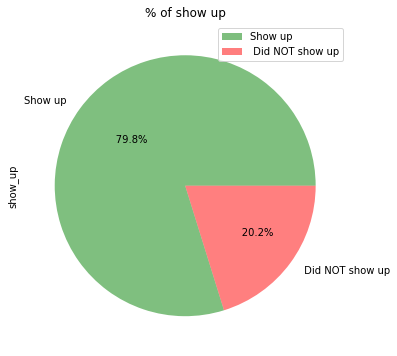

In [50]:
pie_show = df1['show_up'].value_counts().plot(kind='pie' , figsize = (6,6) ,labels=['Show up ',' Did NOT show up'], autopct='%10.1f%%' ,colors = ['green', 'red'], wedgeprops={'alpha':0.5});
plt.title('% of show up') ; 
plt.legend();


### 3.1.2 Gender
Q2 - Which of female or male is more to not showing on their schedule appointment ?

In [51]:
# total number of Female and Male
gender_values = df1['gender'].value_counts()
gender_values

F    71832
M    38687
Name: gender, dtype: int64

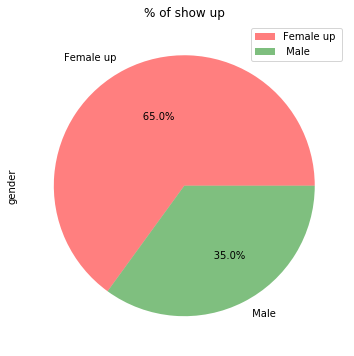

In [52]:
pie_gender = df1['gender'].value_counts().plot(kind='pie' , figsize = (6,6) ,labels=['Female up ',' Male'], autopct='%10.1f%%' ,colors = ['red', 'green'], wedgeprops={'alpha':0.5});
plt.title('% of show up') ; 
plt.legend();

In [53]:
# number of Female and Male who NOT show up
gender_not_show = num_not_show['gender'].value_counts()
gender_not_show

F    14591
M     7725
Name: gender, dtype: int64

In [54]:
g_total = df1.groupby(['gender', 'show_up'])['show_up'].count()
g_not_show = num_not_show.groupby(['gender', 'show_up'])['show_up'].count()
g_show = num_show.groupby(['gender', 'show_up'])['show_up'].count()

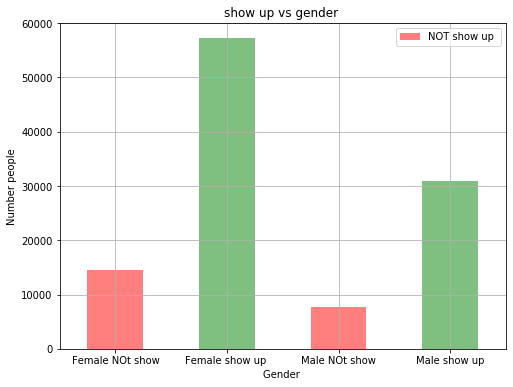

In [55]:
show_up = g_total.plot.bar(color=['red' ,'green' ] , grid = True,label=('NOT show up ')  , figsize = (8,6), alpha = 0.5 , rot=0)
plt.title("show up vs gender ");
plt.xlabel("Gender ") ;
plt.ylabel("Number people") ;
plt.legend() ;
positions = (0, 1 , 2, 3);
labels = ("Female NOt show", "Female show up " , "Male NOt show" , "Male show up");
plt.xticks(positions, labels) ;


In [56]:
per_f_not_show = gender_not_show['F'] / len(df1[df1['gender'] == 'F']) * 100
per_m_not_show = gender_not_show['M'] / len(df1[df1['gender'] == 'M']) * 100
print('The % of Female who did not show up is  {} % and male is  {} % that means gender does not play a role in missing the appointment'.format(per_f_not_show, per_m_not_show))

The % of Female who did not show up is  20.31267401715113 % and male is  19.967947889471915 % that means gender does not play a role in missing the appointment


### 3.1.3 Age
Q3 - Is the age of patients play a role in not show in the scheduled appointment?

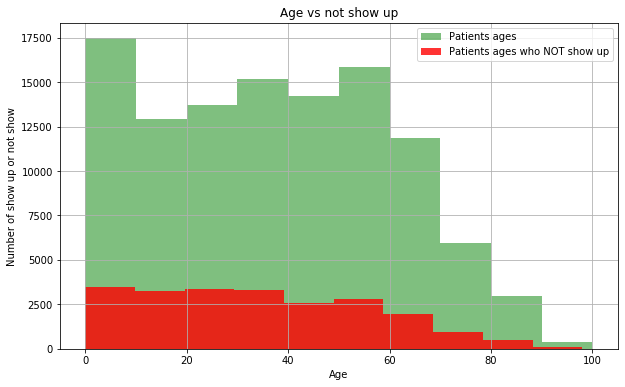

In [57]:
df1['age'].hist(color='green' ,  alpha = 0.5, figsize=(10,6), label = 'Patients ages');
num_not_show['age'].hist(color='red' ,  alpha = 0.8 , label = 'Patients ages who NOT show up');
plt.title('Age vs not show up') ; 
plt.xlabel("Age") ;
plt.ylabel("Number of show up or not show") ;
plt.legend();

In [58]:
age_show = num_show.groupby(['age'])['show_up'].count()
age_not_show = num_not_show.groupby(['age'])['show_up'].count()

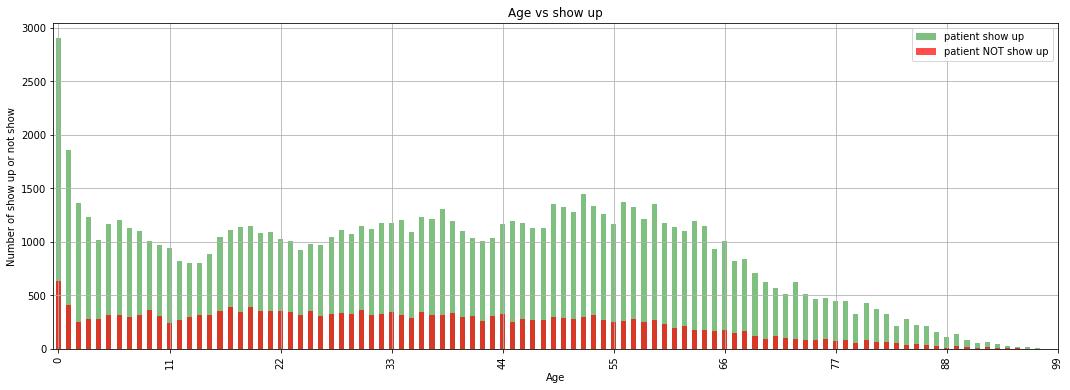

In [59]:
#This chart is to show more details about the relationship between age and not show
age_bar = age_show.plot(kind='bar' , grid = True ,figsize = (18,6) , color = 'green' , label='patient show up' , alpha= 0.5 )
age_bar = age_not_show.plot(kind='bar' ,grid = True, color = 'red', label='patient NOT show up' , alpha= 0.7 )

plt.title('Age vs show up') ; 
plt.xlabel("Age") ;
plt.ylabel("Number of show up or not show") ;
plt.legend();
age_bar.xaxis.set_ticks(np.arange(0, 100, 11 )) ;
age_bar.set_xticklabels(np.arange(0, 100, 11 ))  ;

### 3.1.4 Day/Month of Sechedul
Q4 -  Is there a specific day or month that the patients are more not show up at it?

Tuesday      5291
Wednesday    4879
Monday       4559
Friday       3886
Thursday     3700
Saturday        1
Name: day_of_sechedul, dtype: int64

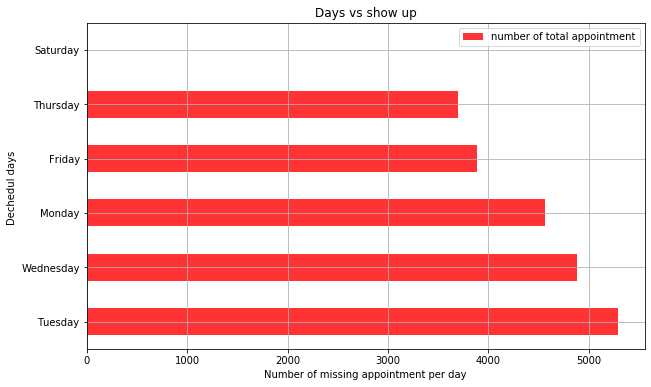

In [60]:
# Day
day_t = df1['day_of_sechedul'].value_counts()
day_not_show = num_not_show['day_of_sechedul'].value_counts()

#plt.day_bar = day_t.plot(kind='barh' , stacked=False, figsize = (10, 6) , color = 'green' , label ='number of total appointment' , alpha=0.5) ;
plt.day_bar = day_not_show.plot(kind='barh' ,grid = True, figsize = (10, 6),color = 'red' , label ='number of total appointment' , alpha=0.8) ;

plt.title('Days vs show up') ; 
plt.xlabel("Number of missing appointment per day") ;
plt.ylabel("Dechedul days ") ;
plt.legend() ;
day_not_show

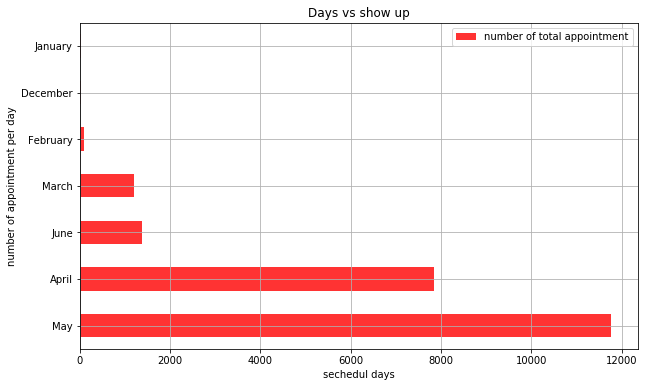

In [61]:
# Month
month_t = df1['month_of_sechedul'].value_counts()
month_not_show = num_not_show['month_of_sechedul'].value_counts()

#plt.day_bar = month_t.plot(kind='barh' , stacked=False, figsize = (10, 6) , color = 'green' , label ='number of total appointment' , alpha=0.5) ;
plt.month_bar = month_not_show.plot(kind='barh', grid = True, figsize = (10, 6) ,color = 'red' , label ='number of total appointment' , alpha=0.8) ;

plt.title('Days vs show up') ; 
plt.xlabel("sechedul days") ;
plt.ylabel("number of appointment per day") ;
plt.legend() ;


### 3.1.5 Day of appointment
Q5 -  Is there a specific day that the patients who not show up on their scheduled appointment are more likely to show up?

Tuesday      5152
Wednesday    5093
Monday       4689
Friday       4037
Thursday     3336
Saturday        9
Name: day_of_appointment, dtype: int64

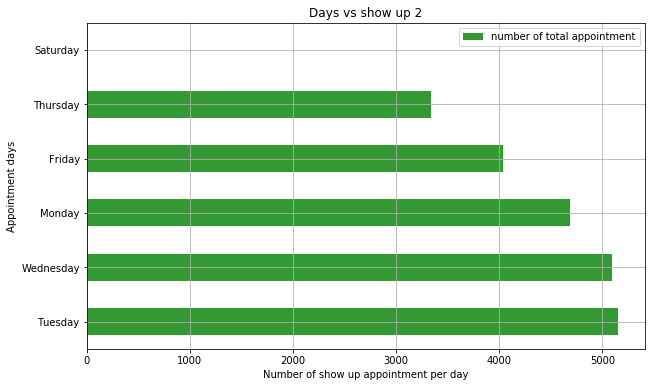

In [62]:
day2_not_show = num_not_show['day_of_appointment'].value_counts()

plt.day2_bar = day2_not_show.plot(kind='barh' , grid = True,figsize = (10, 6),color = 'green' , label ='number of total appointment' , alpha=0.8) ;
plt.title('Days vs show up 2') ; 
plt.xlabel("Number of show up appointment per day") ;
plt.ylabel("Appointment days") ;
plt.legend() ;
day2_not_show

### 3.1.6 Neighborhood
Q6 - Does the neighborhood that patients live in have a relationship with patients not show?

In [63]:
neighbor_show = df1['neighborhood'].value_counts()
neighbor_not_show = num_not_show['neighborhood'].value_counts()


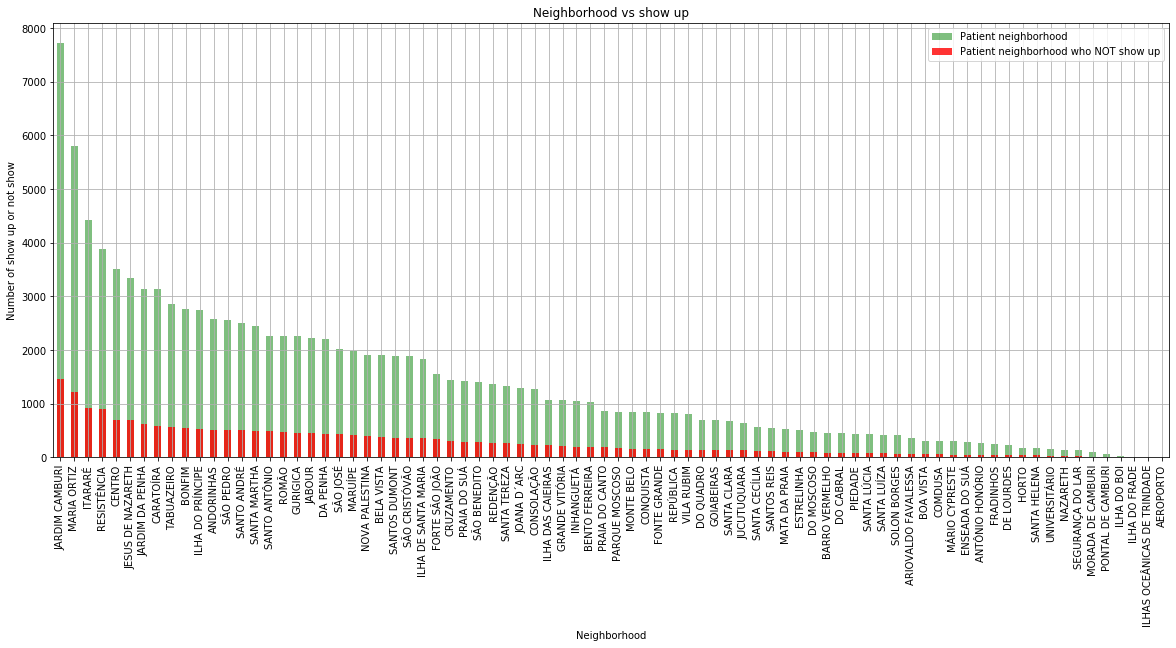

In [64]:
age_bar = neighbor_show.plot(kind='bar' , grid = True,figsize = (20,8) , color = 'green' , label='Patient neighborhood' , alpha= 0.5 )
age_bar = neighbor_not_show.plot(kind='bar' ,grid = True, color = 'red', label='Patient neighborhood who NOT show up' , alpha= 0.8 )

plt.title('Neighborhood vs show up') ; 
plt.xlabel("Neighborhood") ;
plt.ylabel("Number of show up or not show") ;
plt.legend();


### 3.1.7 Scholarship 
Q7 - Are patients who have a scholarship are less to miss their scheduled appointment?

In [65]:
df1['scholarship'].value_counts()

0    99658
1    10861
Name: scholarship, dtype: int64

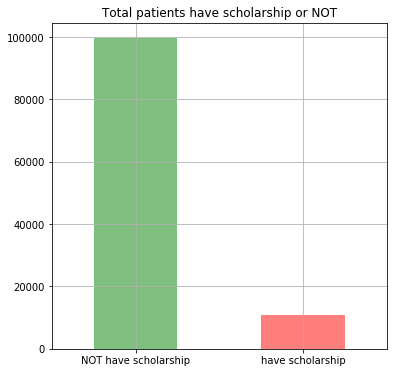

In [66]:
# total number of patients if they have scholarship or NOT
pie_show = df1['scholarship'].value_counts().plot(kind='bar' , grid = True,figsize = (6,6) , color = ['green', 'red'], alpha=0.5 , rot=0 );
plt.title('Total patients have scholarship or NOT') ; 
positions = (0, 1);
labels = ("NOT have scholarship", "have scholarship");
plt.xticks(positions, labels) ;

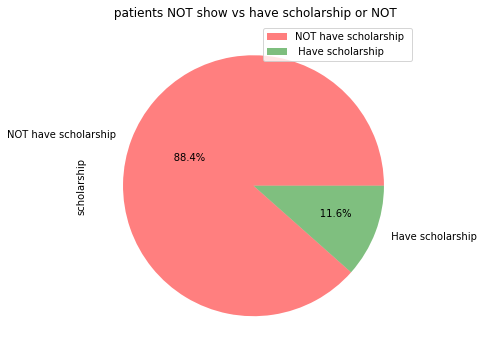

In [67]:
# patients who NOT show up vs have scholarship or NOt
pie_show = num_not_show['scholarship'].value_counts().plot(kind='pie' , figsize = (6,6) , autopct='%10.1f%%' ,colors = ['red', 'green'],labels=['NOT have scholarship ',' Have scholarship'] , wedgeprops={'alpha':0.5});
plt.title(' patients NOT show vs have scholarship or NOT') ; 
plt.legend();

### 3.1.8 Diabetes and Hypertension 
Q8 - Are the patients who have a chronic disease (diabetes, or hypertension) related to not show up?

In [68]:
dh_not_show = num_not_show.query('diabetes == 1 or hypertension == 1')
dh_not_show.count()

patient_id              4061
appointment_id          4061
gender                  4061
year_of_sechedul        4061
month_of_sechedul       4061
day_of_sechedul         4061
time_of_sechedul        4061
year_of_appointment     4061
month_of_appointment    4061
day_of_appointment      4061
age                     4061
neighborhood            4061
scholarship             4061
hypertension            4061
diabetes                4061
alcoholism              4061
handicap                4061
sms_received            4061
show_up                 4061
dtype: int64

In [69]:
dh_total = num_not_show.groupby(['diabetes', 'hypertension'])['show_up'].count()


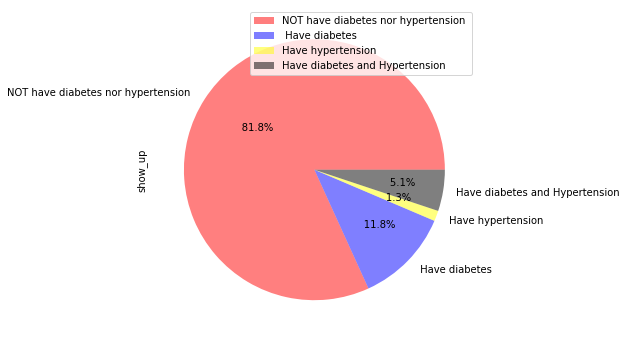

In [70]:
# patients NOT show up vs chronic disease (diabetes, or hypertension)
plt.day_bar = dh_total.plot(kind='pie' , stacked=False, figsize = (6, 6) , labels=['NOT have diabetes nor hypertension ',' Have diabetes','Have hypertension ','Have diabetes and Hypertension'], autopct='%10.1f%%' ,colors = ['red', 'blue' , 'yellow' , 'black'], wedgeprops={'alpha':0.5} ) ;
plt.legend();


### 3.1.8 Alcoholism
Q9 - Do the patients who have alcoholism, are more missing their appointment?

In [71]:
t_alcoholism_f = df1['alcoholism'].value_counts()
t_alcoholism_f

0    107159
1      3360
Name: alcoholism, dtype: int64

In [72]:
alcoholism_f = num_not_show['alcoholism'].value_counts()
alcoholism_f

0    21639
1      677
Name: alcoholism, dtype: int64

In [73]:
per_alcoholism_f_not_show = (alcoholism_f[1] / t_alcoholism_f[1]) * 100
per_alcoholism_f_not_show

20.148809523809526

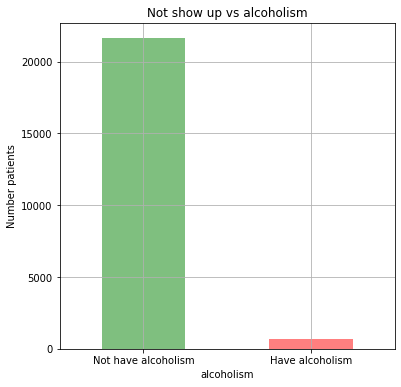

In [74]:
# patients NOT show up vs alcoholism
alcoholism_f.plot(kind='bar' , color =['green' , 'red'] ,grid = True, figsize=(6,6) , alpha=0.5 , rot=0) ;
plt.title('Not show up vs alcoholism') ; 
plt.xlabel("alcoholism") ;
plt.ylabel("Number patients") ;
positions = (0, 1);
labels = ("Not have alcoholism", "Have alcoholism");
plt.xticks(positions, labels) ;

### 3.1.9 Handicap
Q10 - Do the patients who are handicap, are more missing their appointment?

In [75]:
t_handicap_f = df1['handicap'].value_counts()
t_handicap_f

0    108282
1      2237
Name: handicap, dtype: int64

In [76]:
handicap_f = num_not_show['handicap'].value_counts()
handicap_f

0    21912
1      404
Name: handicap, dtype: int64

In [77]:
per_handicap_f_not_show = (handicap_f[1] / t_handicap_f[1]) * 100
per_handicap_f_not_show

18.059901654000893

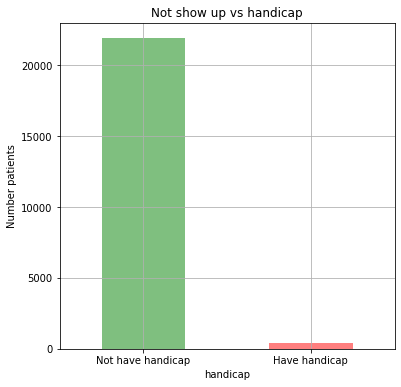

In [78]:
# patients NOT show up vs handicap
handicap_f.plot(kind='bar' , color =['green' , 'red'] ,grid = True, figsize=(6,6) , alpha=0.5 , rot=0) ;
plt.title('Not show up vs handicap') ; 
plt.xlabel("handicap") ;
plt.ylabel("Number patients") ;
positions = (0, 1);
labels = ("Not have handicap", "Have handicap");
plt.xticks(positions, labels) ;

### 3.1.10 SMS
Q11 - Do patients who receive SMS are less likely to not show up on their appointment?

In [79]:
sms = df1['sms_received'].value_counts()
sms

0    75038
1    35481
Name: sms_received, dtype: int64

In [80]:
sms_q = df1.query('show_up == 0 & sms_received == 1')
sms_q['show_up'].count()

9784

In [81]:
per_sms_not_show = ((sms_q['show_up'].count()) / sms[1] ) * 100
per_sms_not_show

27.575322003325724

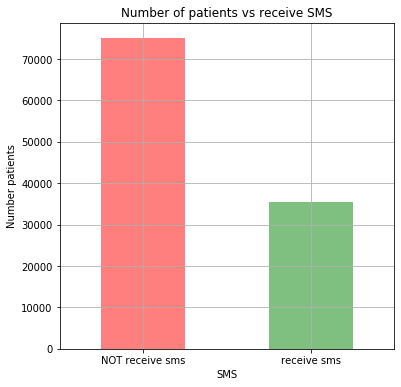

In [82]:
# total number of patients vs receive SMS
sms.plot(kind='bar' , color =['red' , 'green'] ,grid = True, figsize=(6,6) , alpha=0.5 , rot=0) ;
plt.title('Number of patients vs receive SMS') ; 
plt.xlabel("SMS") ;
plt.ylabel("Number patients") ;
positions = (0, 1);
labels = ("NOT receive sms", "receive sms");
plt.xticks(positions, labels) ;

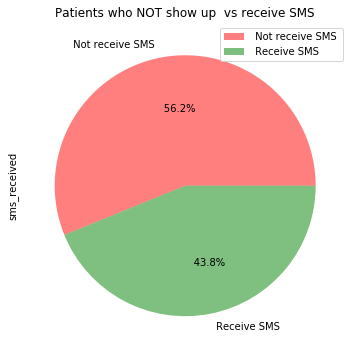

In [83]:
pie_show = num_not_show['sms_received'].value_counts().plot(kind='pie' , figsize = (6,6) , autopct='%10.1f%%' ,colors = ['red', 'green'],labels=[' Not receive SMS ',' Receive SMS'], wedgeprops={'alpha':0.5});
plt.title('Patients who NOT show up  vs receive SMS') ; 
plt.legend() ;

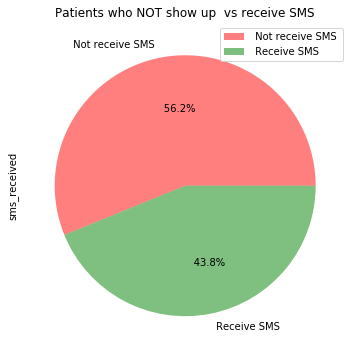

In [84]:
# percentage of patients who NOT show up vs receive SMS or nor
pie_show = num_not_show['sms_received'].value_counts().plot(kind='pie' , figsize = (6,6) , autopct='%10.1f%%' ,colors = ['red', 'green'],labels=[' Not receive SMS ',' Receive SMS'], wedgeprops={'alpha':0.5});
plt.title('Patients who NOT show up  vs receive SMS') ; 
plt.legend() ;


## 3.2 Correlation 
To see if there a relationship between show up and the factors

In [85]:
df1_corr = df1.corr()
df1_corr

,patient_id,appointment_id,year_of_sechedul,year_of_appointment,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
patient_id,1.000000,0.004026,-0.000935,NaN,-0.004207,-0.002867,-0.006475,0.001617,0.011020,-0.008546,-0.009768,0.001411
appointment_id,0.004026,1.000000,0.177435,NaN,-0.019152,0.022624,0.012752,0.022636,0.032950,0.015138,-0.256627,0.162585
year_of_sechedul,-0.000935,0.177435,1.000000,NaN,-0.026791,0.001403,-0.035311,-0.006723,0.004195,-0.007449,-0.018903,0.006169
year_of_appointment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.004207,-0.019152,-0.026791,NaN,1.000000,-0.092427,0.504788,0.292544,0.095877,0.083005,0.012712,0.060476
scholarship,-0.002867,0.022624,0.001403,NaN,-0.092427,1.000000,-0.019734,-0.024900,0.035018,-0.009030,0.001184,-0.029147
hypertension,-0.006475,0.012752,-0.035311,NaN,0.504788,-0.019734,1.000000,0.433095,0.087971,0.085054,-0.006315,0.035677
diabetes,0.001617,0.022636,-0.006723,NaN,0.292544,-0.024900,0.433095,1.000000,0.018470,0.059265,-0.014559,0.015172
alcoholism,0.011020,0.032950,0.004195,NaN,0.095877,0.035018,0.087971,0.018470,1.000000,0.003739,-0.026153,0.000191
handicap,-0.008546,0.015138,-0.007449,NaN,0.083005,-0.009030,0.085054,0.059265,0.003739,1.000000,-0.025070,0.007634


In [86]:
df1_corr['show_up']

patient_id             0.001411
appointment_id         0.162585
year_of_sechedul       0.006169
year_of_appointment         NaN
age                    0.060476
scholarship           -0.029147
hypertension           0.035677
diabetes               0.015172
alcoholism             0.000191
handicap               0.007634
sms_received          -0.126472
show_up                1.000000
Name: show_up, dtype: float64

# 4. Export The Data Sets

In [87]:
df1.to_csv('editcopy_noshow.csv', index=False)
num_not_show.to_csv('only_noshow.csv', index=False)
num_show.to_csv('only_show.csv', index=False)

# 5. Conclusion

1 - 79.8% of the patients are showed up on their scheduled appointment and only 20.2 % not showed.

2 - 65% of the total patients are female and 35 % are Male. The patients who not showed on their scheduled appointment are 20.3 %  of total females and 19.9%  of males. So, gender is not a factor in not show up.

3 - The patient's age range between 0 to 100.  The patients who are in age from 0 to 1 and between  15 to 30 are more not showed compared to the older patients.

4 - The day and month which the patients more often to not showed are Tuesday and Wednesday . while May is the most month where the patients not showed.

6 - The patients who not showed on their scheduled appointment are more likely to show up on Tuesday and Wednesday, which is a surprise because these days have the highest not showed patients.

7 - Jardim Camburi and Maria Ortiz neighborhoods have the most not showed patients, but if we compared Jardim Camburi neighborhood to Maria Ortiz neighborhood, we can see the total appointments for patients from Jardim Camburi neighborhood is way more than the total appointments for patients from Maria Ortiz, but the not showed patients are almost equally. So we can say that Maria Ortiz neighborhood has the highest not showed patients.

8 - More than 99500 patients have not scholarship and 88.4 % of not showed patients do not have a scholarship. So we can see that scholarship is a factor in not showed patients.

9 - 4061 patients of the total patients have either diabetes to hypertension.

81.8 % of patients who not showed are have not either diabetes or hypertension and 11.8% have only diabetes,  1.3% have both diabetes and hypertension, and 5.1% have hypertension.

So we can say that the patients who have either diabetes or hypertension are less likely to not show up.

10 - The patients who have alcoholism are less likely to not show up, only 677 patients which represent only 20,1 % of total patients who have alcoholism are not show up on their scheduled appointments.

11 - The patients who have a handicap and not showed up on their scheduled appointments are only 18 %of the total handicap patients. So handicap patients are more likely to show up on their scheduled appointments.

12 - 35481 of patients receive SMS and 9784 of them not showing up . so 27.5 % of patients receive SMS not showed.
That means SMS could be a not factor in not showed up.

## 5.1 Limitations

1- The data set did not specify the reason for the appointment (What is the department in the hospital which the appointment take place).

2- The neighborhood of patients is not clear if it closes or far from the hospital.

3- The data set did not mention if the patients have health insurance or not have.
